In [175]:
# 0º Baixar e analisar base csv.
# 1º Importar e disponibilizar base em csv.
# 2º Higienizar a base de acordo com os parametros passados.
    # -> Remover missing values.
    # -> Remover colunas que não serão utilizadas.
        # -> Colunas que irão permanecer:
            # - Purchase Date
            # - Product Category
            # - Product Price
            # - Quantity
            # - Total Purchase Amount
            # - NPS
            # - Customer Age
            # - Gender
            # - Source            
# 3º Roteiro de analise.
    # -> Quais produtos mais vendidos considerando os ultimos 3 anos?
    # -> Qual o produto mais caro e o mais barato?
    # -> Qual categoria de produto mais vendida e menos vendida?
    # -> Qual categoria mais e menos cara?
    # -> Qual o produto com o melhor e pior NPS?
# 4º Pensar em um modelo de dados para descobrir qual o melhor tipo de público (considerando genero e idade),
# e o canal ideal para vender determinado tipo de produto? (Regressão Logistica).

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [176]:
# 1º Importar e disponibilizar base em csv.
ecommerce_df = pd.read_csv('/kaggle/input/ecommerce/Ecommerce_DBS.csv', delimiter = ',')
ecommerce_df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,NPS,Customer Age,Gender,Source,Country,State,Latitude,Longituide
0,46251,08/09/2020,Electronics,12,3,740,7,20,Male,Instagram Campign,Canada,Alberta,55.000000,-115.000000
1,46251,05/03/2022,Home,468,4,2739,8,20,Male,Instagram Campign,Canada,Ontario,50.000000,-85.000000
2,46251,23/05/2022,Home,288,2,3196,10,20,Male,SEM,United States,New Mexico,34.840515,-106.248482
3,46251,12/11/2020,Clothing,196,1,3509,3,20,Male,Instagram Campign,Canada,Saskatchewan,55.000000,-106.000000
4,13593,27/11/2020,Home,449,1,3452,3,20,Female,Instagram Campign,United States,California,36.116203,-119.681564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33308,10/08/2023,Clothing,279,2,2187,1,55,Male,SEM,United States,Indiana,39.849426,-86.258278
249996,48835,23/11/2021,Home,27,1,3615,1,42,Female,Instagram Campign,Canada,Quebec,53.000000,-70.000000
249997,21019,02/07/2020,Home,17,5,2466,0,41,Male,Instagram Campign,United States,Indiana,39.849426,-86.258278
249998,49234,30/12/2020,Books,398,2,3668,8,34,Female,Instagram Campign,Canada,New Brunswick,46.498390,-66.159668


In [177]:
# 2º Higienizar a base de acordo com os parametros passados. (Remover missing values.)
ecommerce_df.replace("SEM", np.nan, inplace=True)
ecommerce_df.dropna(inplace=True)
ecommerce_df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,NPS,Customer Age,Gender,Source,Country,State,Latitude,Longituide
0,46251,08/09/2020,Electronics,12,3,740,7,20,Male,Instagram Campign,Canada,Alberta,55.000000,-115.000000
1,46251,05/03/2022,Home,468,4,2739,8,20,Male,Instagram Campign,Canada,Ontario,50.000000,-85.000000
3,46251,12/11/2020,Clothing,196,1,3509,3,20,Male,Instagram Campign,Canada,Saskatchewan,55.000000,-106.000000
4,13593,27/11/2020,Home,449,1,3452,3,20,Female,Instagram Campign,United States,California,36.116203,-119.681564
5,13593,07/03/2023,Home,250,4,575,3,20,Female,Instagram Campign,United States,California,36.116203,-119.681564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249993,35965,13/10/2022,Home,83,5,1335,10,19,Female,FaceBook campaign,United States,Georgia,33.040619,-83.643074
249996,48835,23/11/2021,Home,27,1,3615,1,42,Female,Instagram Campign,Canada,Quebec,53.000000,-70.000000
249997,21019,02/07/2020,Home,17,5,2466,0,41,Male,Instagram Campign,United States,Indiana,39.849426,-86.258278
249998,49234,30/12/2020,Books,398,2,3668,8,34,Female,Instagram Campign,Canada,New Brunswick,46.498390,-66.159668


In [178]:
# 2º Higienizar a base de acordo com os parametros passados. (Remover colunas que não serão utilizadas.)
# Colunas não utilizadas: Customer ID, Country, State, Latitude, Longituide.
ecommerce_df.drop(["Country", "State", "Latitude", "Longituide"], axis=1, inplace=True)
ecommerce_df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,NPS,Customer Age,Gender,Source
0,46251,08/09/2020,Electronics,12,3,740,7,20,Male,Instagram Campign
1,46251,05/03/2022,Home,468,4,2739,8,20,Male,Instagram Campign
3,46251,12/11/2020,Clothing,196,1,3509,3,20,Male,Instagram Campign
4,13593,27/11/2020,Home,449,1,3452,3,20,Female,Instagram Campign
5,13593,07/03/2023,Home,250,4,575,3,20,Female,Instagram Campign
...,...,...,...,...,...,...,...,...,...,...
249993,35965,13/10/2022,Home,83,5,1335,10,19,Female,FaceBook campaign
249996,48835,23/11/2021,Home,27,1,3615,1,42,Female,Instagram Campign
249997,21019,02/07/2020,Home,17,5,2466,0,41,Male,Instagram Campign
249998,49234,30/12/2020,Books,398,2,3668,8,34,Female,Instagram Campign


In [179]:
# Quais produtos mais vendidos considerando os ultimos 3 anos?

# Filtrar Ultimos 3 anos.
data_da_analise = datetime.strptime("29/05/2024", "%d/%m/%Y")
ecommerce_df["Purchase Date"] = pd.to_datetime(ecommerce_df["Purchase Date"], format='%d/%m/%Y')
data_limite = data_da_analise - timedelta(days=3*365)
ecommerce_ultimos_3_anos_df = ecommerce_df[ecommerce_df["Purchase Date"] >= data_limite]

# Quais produtos mais vendidos?
vendas_por_categoria = ecommerce_ultimos_3_anos_df.groupby("Product Category")["Quantity"].sum()
produto_mais_vendido = vendas_por_categoria.idxmax()
produto_mais_vendido

'Clothing'

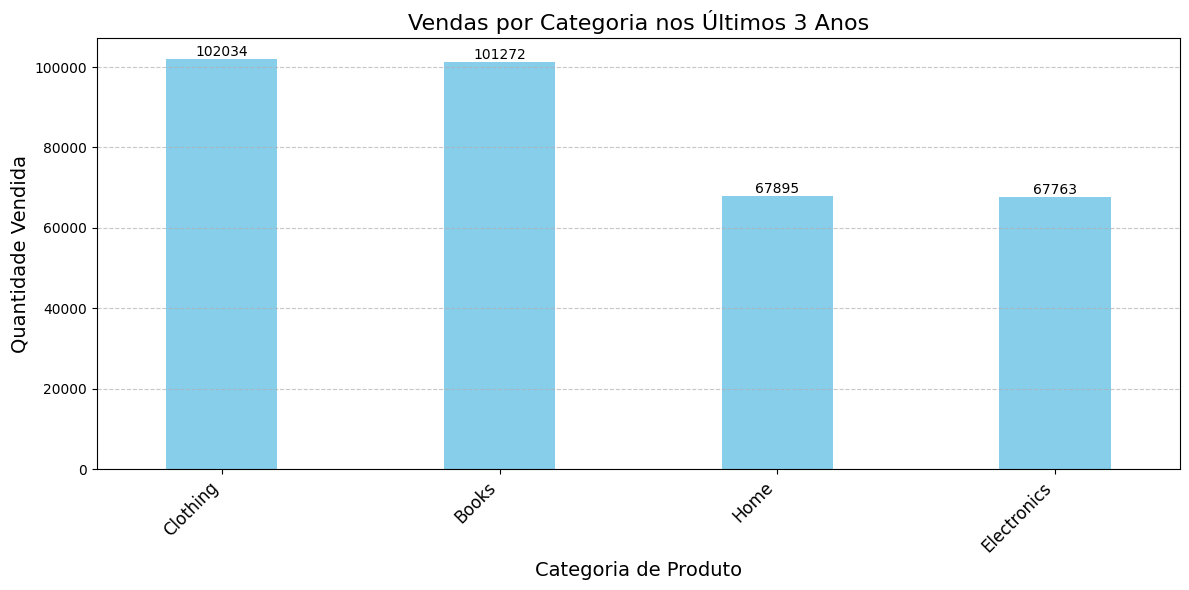

In [180]:
plt.figure(figsize=(12, 6))  
vendas_por_categoria.sort_values(ascending=False).plot(kind='bar', color='skyblue', width=0.4) 
plt.title('Vendas por Categoria nos Últimos 3 Anos', fontsize=16) 
plt.xlabel('Categoria de Produto', fontsize=14)  
plt.ylabel('Quantidade Vendida', fontsize=14) 
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()


for i, v in enumerate(vendas_por_categoria.sort_values(ascending=False)):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()


In [181]:
#Qual o produto mais caro e o mais barato?
preco_medio_por_categoria = ecommerce_df.groupby("Product Category")["Product Price"].mean()
produto_mais_caro = preco_medio_por_categoria.idxmax()
preco_mais_caro = ecommerce_df.loc[ecommerce_df["Product Category"] == produto_mais_caro]["Product Price"].mean()

produto_mais_barato = preco_medio_por_categoria.idxmin()
preco_mais_barato = ecommerce_df.loc[ecommerce_df["Product Category"] == produto_mais_barato]["Product Price"].mean()

result = {"produto_mais_caro": produto_mais_caro,
          "preco_mais_caro": preco_mais_caro,
          "produto_mais_barato": produto_mais_barato,
          "preco_mais_barato": preco_mais_barato}
result

{'produto_mais_caro': 'Home',
 'preco_mais_caro': 255.13443569696804,
 'produto_mais_barato': 'Books',
 'preco_mais_barato': 254.4994879859562}

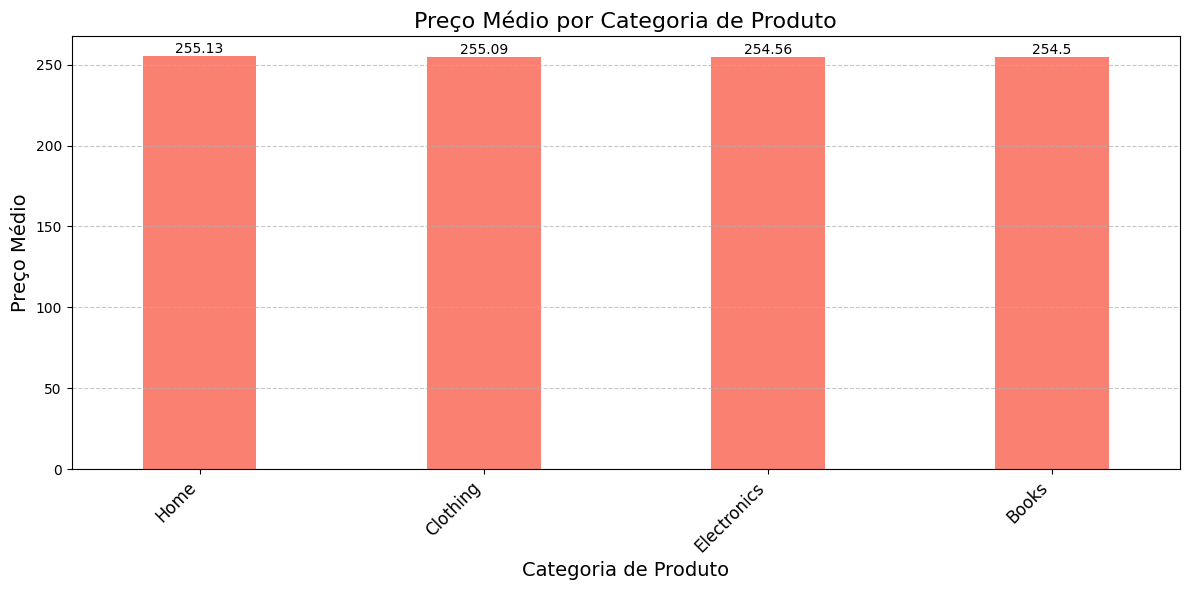

In [182]:
plt.figure(figsize=(12, 6)) 
preco_medio_por_categoria.sort_values(ascending=False).plot(kind='bar', color='salmon', width=0.4) 
plt.title('Preço Médio por Categoria de Produto', fontsize=16) 
plt.xlabel('Categoria de Produto', fontsize=14) 
plt.ylabel('Preço Médio', fontsize=14) 
plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  

for i, v in enumerate(preco_medio_por_categoria.sort_values(ascending=False)):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [183]:
# Qual categoria de produto mais vendida e menos vendida?

vendas_por_categoria = ecommerce_df.groupby("Product Category")["Quantity"].sum()

produto_mais_vendido = vendas_por_categoria.idxmax()
total_mais_vendido = vendas_por_categoria.max()

produto_menos_vendido = vendas_por_categoria.idxmin()
total_menos_vendido = vendas_por_categoria.min()

result = {"produto_mais_vendido": produto_mais_vendido,
            "total_mais_vendido": total_mais_vendido,
            "produto_menos_vendido": produto_menos_vendido,
            "total_menos_vendido": total_menos_vendido}
result

{'produto_mais_vendido': 'Clothing',
 'total_mais_vendido': 165027,
 'produto_menos_vendido': 'Home',
 'total_menos_vendido': 110016}

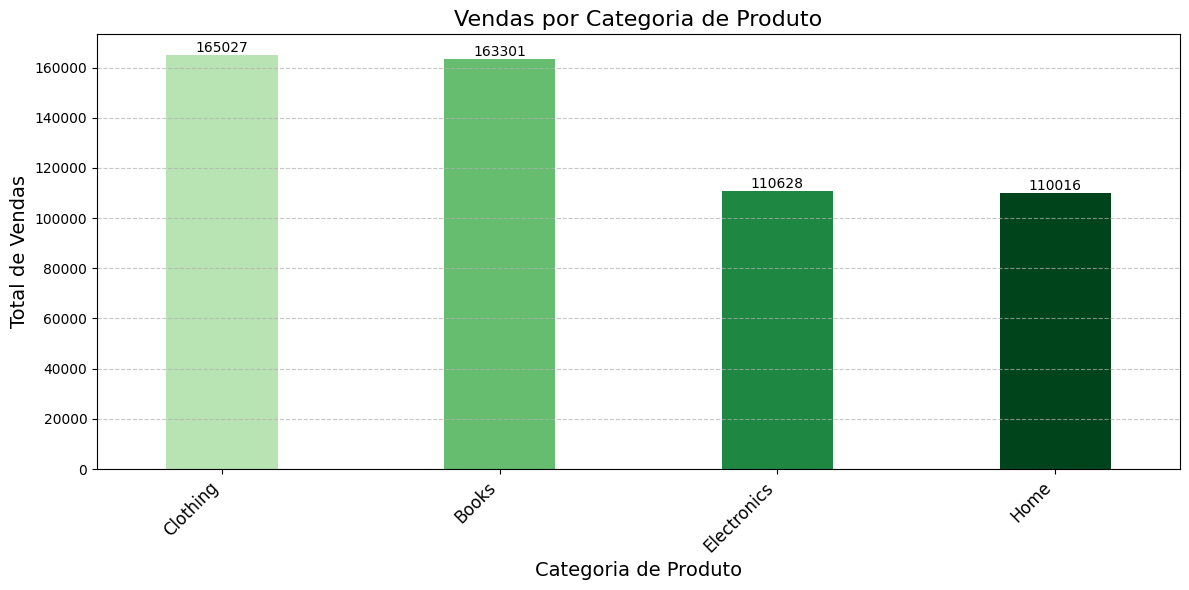

In [184]:

colors = plt.cm.Greens(np.linspace(0.3, 1, len(vendas_por_categoria)))

plt.figure(figsize=(12, 6)) 
vendas_por_categoria.sort_values(ascending=False).plot(kind='bar', color=colors, width=0.4) 
plt.title('Vendas por Categoria de Produto', fontsize=16)  
plt.xlabel('Categoria de Produto', fontsize=14) 
plt.ylabel('Total de Vendas', fontsize=14)  
plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  

for i, v in enumerate(vendas_por_categoria.sort_values(ascending=False)):
    plt.text(i, v + 0.5, str(round(v, 2)), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [185]:
# Qual categoria mais e menos cara?
preco_medio_por_categoria = ecommerce_df.groupby("Product Category")["Product Price"].mean()

categoria_mais_cara = preco_medio_por_categoria.idxmax()
preco_mais_caro = preco_medio_por_categoria.max()

categoria_menos_cara = preco_medio_por_categoria.idxmin()
preco_menos_caro = preco_medio_por_categoria.min()

result = {"categoria_mais_cara": categoria_mais_cara,
            "preco_mais_caro": preco_mais_caro,
            "categoria_menos_cara": categoria_menos_cara,
            "preco_menos_caro": preco_menos_caro}
result

{'categoria_mais_cara': 'Home',
 'preco_mais_caro': 255.13443569696804,
 'categoria_menos_cara': 'Books',
 'preco_menos_caro': 254.4994879859562}

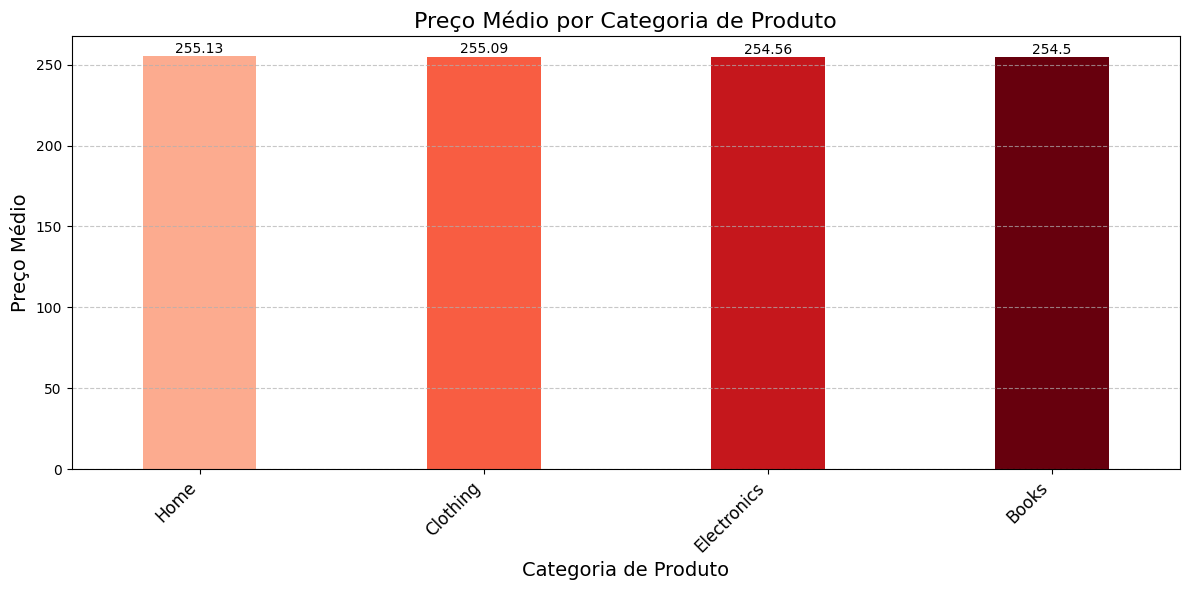

In [186]:
colors = plt.cm.Reds(np.linspace(0.3, 1, len(preco_medio_por_categoria)))

plt.figure(figsize=(12, 6)) 
preco_medio_por_categoria.sort_values(ascending=False).plot(kind='bar', color=colors, width=0.4)  
plt.title('Preço Médio por Categoria de Produto', fontsize=16)  
plt.xlabel('Categoria de Produto', fontsize=14) 
plt.ylabel('Preço Médio', fontsize=14)  
plt.xticks(rotation=45, ha='right', fontsize=12) 
plt.grid(axis='y', linestyle='--', alpha=0.7)  

for i, v in enumerate(preco_medio_por_categoria.sort_values(ascending=False)):
    plt.text(i, v + 0.5, str(round(v, 2)), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [187]:
# Qual o produto com o melhor e pior NPS?
nps_medio_por_categoria = ecommerce_df.groupby("Product Category")["NPS"].mean()

produto_melhor_nps = nps_medio_por_categoria.idxmax()
melhor_nps = nps_medio_por_categoria.max()

produto_pior_nps = nps_medio_por_categoria.idxmin()
pior_nps = nps_medio_por_categoria.min()

result = {"produto_melhor_nps": produto_melhor_nps,
            "melhor_nps": melhor_nps,
            "produto_pior_nps": produto_pior_nps,
            "pior_nps": pior_nps}
result

{'produto_melhor_nps': 'Home',
 'melhor_nps': 5.023645427551827,
 'produto_pior_nps': 'Electronics',
 'pior_nps': 4.964594807238395}

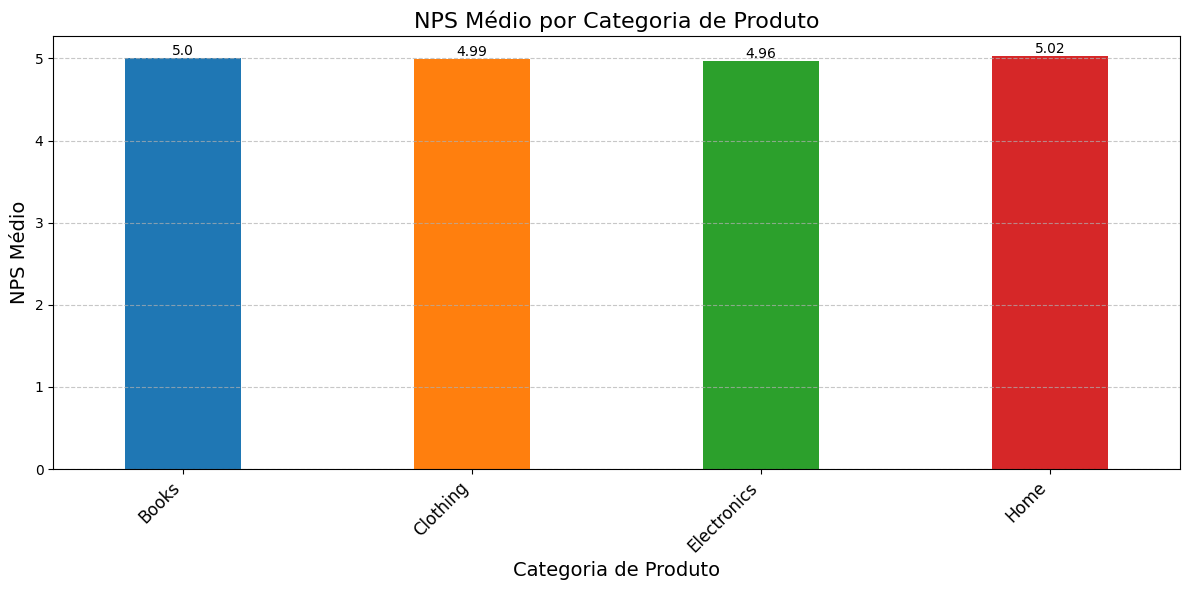

In [188]:
colors = plt.cm.tab10(range(len(nps_medio_por_categoria)))

plt.figure(figsize=(12,6))
nps_medio_por_categoria.plot(kind='bar', color=colors, width=0.4)
plt.title('NPS Médio por Categoria de Produto', fontsize=16)
plt.xlabel('Categoria de Produto', fontsize=14)
plt.ylabel('NPS Médio', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(nps_medio_por_categoria):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [189]:
#Pensar em um modelo de dados para descobrir qual o melhor tipo de público (considerando genero e idade),
# e o canal ideal para vender determinado tipo de produto?

X = ecommerce_df[['Customer Age ', 'Gender', 'Source']]
y = ecommerce_df['Product Category']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.296273054676416